In [1]:
!pip install dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS

In [3]:
def load_data(filepath):
    users = list()
    movies = list()
    ratings = list()

    with open(filepath, 'r') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            users.append(row[0])
            movies.append(row[1])
            ratings.append(float(row[2]))

        users = np.array(users)
        movies = np.array(movies)
        ratings = np.array(ratings)
        coo_mat = COOMatrix.from_raw_data(users, movies, ratings)

    return coo_mat

In [31]:
coo_mat = load_data('ml-latest-small/ratings.csv')

In [32]:
csr = CSRMatrix.from_coo(coo_mat)

In [33]:
csc = CSCMatrix.from_coo(coo_mat)

In [34]:
als = BiasOnlyALS(lambda_reg=0.05)

In [35]:
als.fit(csr_matrix=csr, csc_matrix=csc,n_iterations=10)

Iteration 1/10 - RMSE: 0.8043, NLL: 32748.4702
Iteration 2/10 - RMSE: 0.7871, NLL: 31393.1346
Iteration 3/10 - RMSE: 0.7859, NLL: 31299.9066
Iteration 4/10 - RMSE: 0.7857, NLL: 31291.4078
Iteration 5/10 - RMSE: 0.7857, NLL: 31290.3288
Iteration 6/10 - RMSE: 0.7857, NLL: 31290.1021
Iteration 7/10 - RMSE: 0.7857, NLL: 31290.0069
Iteration 8/10 - RMSE: 0.7857, NLL: 31289.9373
Iteration 9/10 - RMSE: 0.7857, NLL: 31289.8736
Iteration 10/10 - RMSE: 0.7857, NLL: 31289.8117


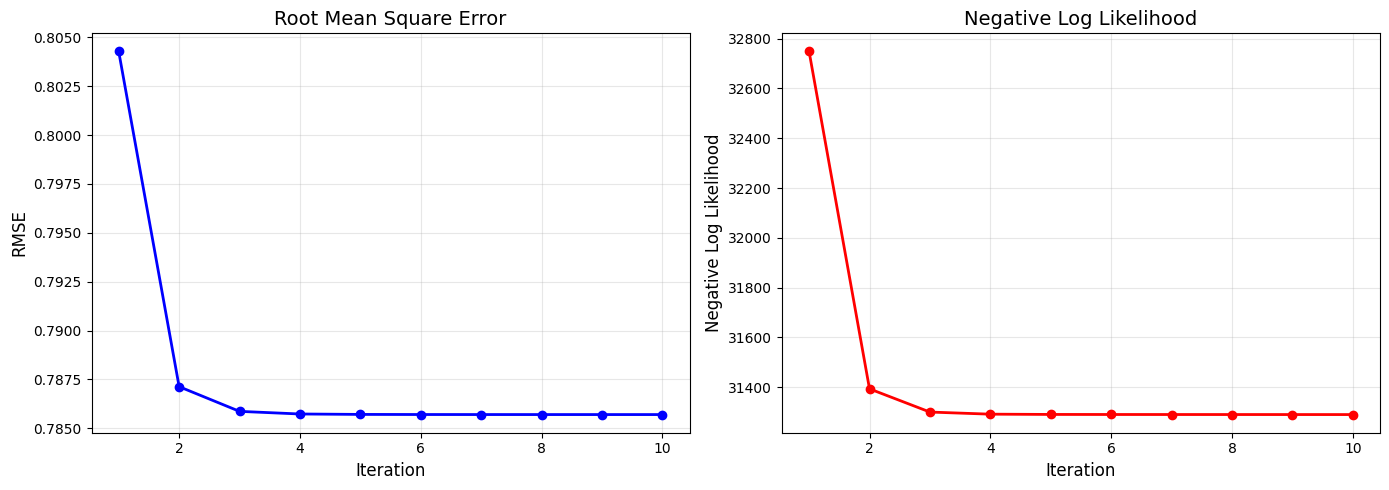

In [36]:
als.plot_metrics()